In [1]:
import pyNUISANCE as pn

Welcome to JupyROOT 6.30/04


In [2]:
gevs = pn.EventSource(
    "/root/software/GiBUU/kaihepmc3/release2023/testRun/EventOutput.Pert.hepmc3")

gri = gevs.run_info()
pn.hm.HepMC3.Print.listing(gri)

________________________________________________________________________
GenRunInfo:
 Names: ( CV )
 Tools: 
GenRunInfo::ToolInfo GiBUU 2024.0 Attributes:
GiBUU.DeltaT 0.2000000000000000
GiBUU.Ensembles 40000
GiBUU.EventType 5
GiBUU.FlavorID 2
GiBUU.FreezeRealParticles 1
GiBUU.FullEnsemble 1
GiBUU.LocalEnsemble 1
GiBUU.NucDensitySwitchStatic 2
GiBUU.NucFermiMomentumInput 0.2250000000000000
GiBUU.NucFermiMotion 1
GiBUU.NucMaxDist 0.5180000000000000E+1
GiBUU.NucRadius 0.3724124464664126E+1
GiBUU.NucSurface 0.4766985000000000
GiBUU.NumEnergies 1
GiBUU.ProcessID 2
GiBUU.RandomSeed 45678
GiBUU.Runs 1
GiBUU.TimeSteps 150
NuHepMC.Citations.Generator.DOI 10.1016/j.physrep.2011.12.001 10.1088/1361-6471/ab3830
NuHepMC.Citations.Generator.arXiv 1106.1344 1904.11506 2308.16161
NuHepMC.Conventions E.C.1 E.C.4 E.C.5 G.C.1 G.C.4 G.C.6 P.C.1 P.C.2 V.C.1
NuHepMC.ParticleStatusIDs 22 23
NuHepMC.ParticleStatusInfo[22].Description Nuclear remnant for bookkeeping
NuHepMC.ParticleStatusInfo[22].Name NuclRem

In [3]:
evf = pn.EventFrameGen(gevs) \
    .add_column("enu",pn.pps.ext.enu_GeV) \
    .add_int_column("topo",pn.pps.ext.final_state_topology) \
    .add_column("q0",pn.pps.ext.q0lep_GeV) \
    .add_column("q3",pn.pps.ext.q3lep_GeV)

topo_labels = [ "CC0Pi",
    "NC0Pi",
    "CC1Pi",
    "NC1Pi",
    "CCMultiPi",
    "NCMultiPi" ]

In [4]:
ef = evf.firstArrow(int(1E6))
ef.to_pandas()

,event.number,weight.cv,fatx_per_sumw.pb_per_target.estimate,fatx_per_sumw.pb_per_nucleon.estimate,process.id,enu,topo,q0,q3
0,1,9.902546e-07,0.4,0.01,300,1.611614,0,0.238450,0.688920
1,2,3.455159e-06,0.4,0.01,401,3.984664,2,2.908991,3.314981
2,3,2.829323e-06,0.4,0.01,400,2.528978,0,0.722872,0.887184
3,4,2.909632e-06,0.4,0.01,400,8.574619,2,1.075993,1.838175
4,5,3.327254e-06,0.4,0.01,502,1.794940,2,1.405259,1.559699
...,...,...,...,...,...,...,...,...,...
766880,766881,7.228260e-08,0.4,0.01,200,3.032157,0,0.024483,0.242654
766881,766882,9.765026e-07,0.4,0.01,200,0.513687,0,0.027399,0.201811
766882,766883,7.080009e-05,0.4,0.01,200,1.548039,0,0.026310,0.139059
766883,766884,4.709131e-07,0.4,0.01,200,0.341243,0,0.034418,0.224041


The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


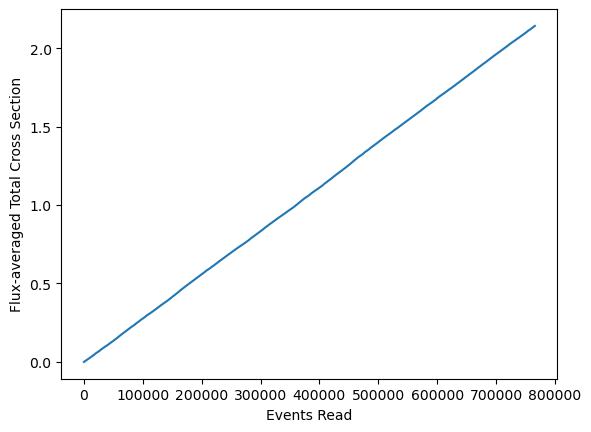

In [5]:
import matplotlib.pyplot as plt

x = []
xs = []
for i, (ev, cv_weight) in enumerate(gevs):
    if not i % 1000:
        x.append(i)
        xs.append(ev.cross_section().xsec())

plt.plot(x,xs)
plt.ylabel("Flux-averaged Total Cross Section")
plt.xlabel("Events Read")
plt.show()

In [6]:
print(f"GiBUU FATX = {gevs.norm_info(pn.nhm.FATXUtils.cm2ten38_PerNucleon).fatx} cm^2 10^-38 /N")

GiBUU FATX = 2.144613265286322 cm^2 10^-38 /N


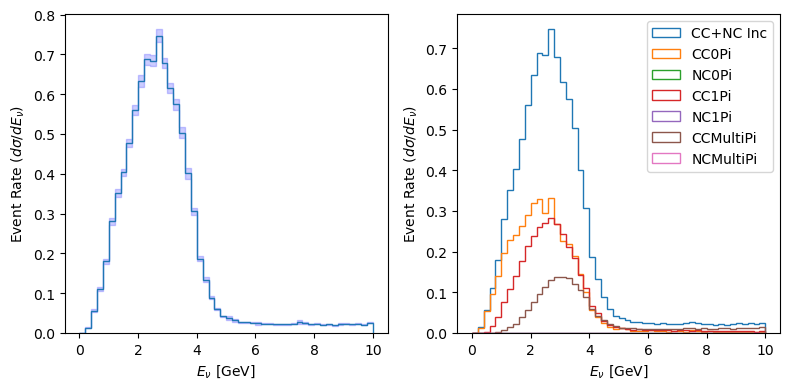

In [7]:
fig, (ax_all, ax_split) = plt.subplots(1,2, figsize=(8,4))

enuh = pn.HistFrame(pn.Binning.lin_space(0,10,50,r"$E_{\nu}$ [GeV]"), "CC+NC Inc")
enuh.fill(ef, ["enu"], [pn.HistFrame.fill_column(0), pn.HistFrame.categorize_by("topo", topo_labels)])
enuh = enuh.finalise()

plt.sca(ax_all)
enuh.mpl().hist(histtype="step", errorband_color="#00F3")
plt.ylabel(r"Event Rate ($d\sigma/dE_{\nu}$)")

plt.sca(ax_split)
enuh.mpl().hist_all(histtype="step")
plt.ylabel(r"Event Rate ($d\sigma/dE_{\nu}$)")
plt.legend()

fig.tight_layout()
fig.show()

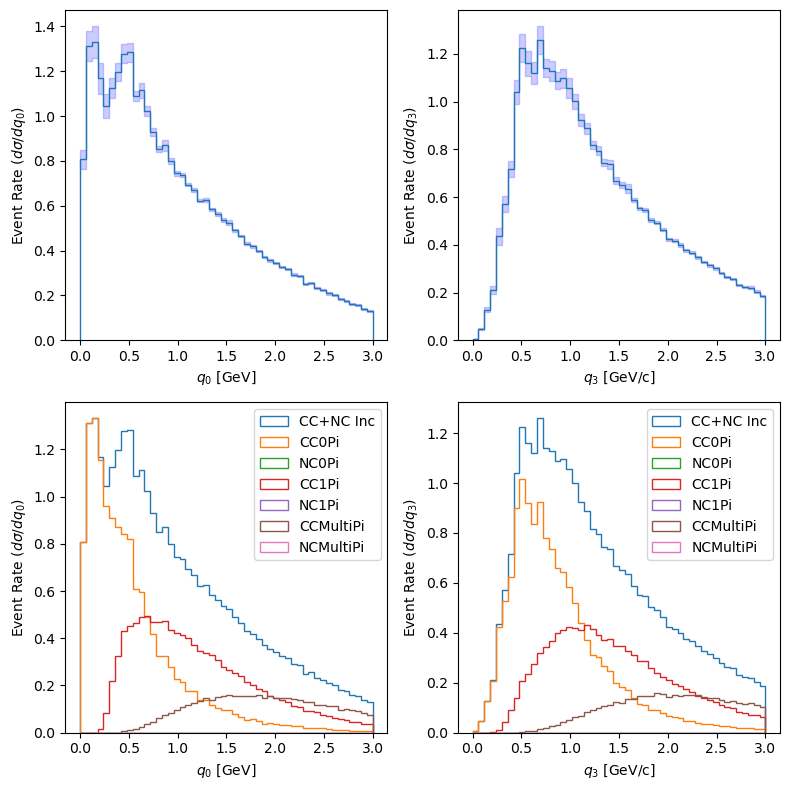

In [8]:
fig, (ax_all, ax_split) = plt.subplots(2,2, figsize=(8,8))

q0h = pn.HistFrame(pn.Binning.lin_space(0,3,50,r"$q_{0}$ [GeV]"), "CC+NC Inc")
q0h.fill(ef, ["q0"], [pn.HistFrame.fill_column(0), pn.HistFrame.categorize_by("topo", topo_labels)])
q0h = q0h.finalise()

plt.sca(ax_all[0])
q0h.mpl().hist(histtype="step", errorband_color="#00F3")
plt.ylabel(r"Event Rate ($d\sigma/dq_{0}$)")

plt.sca(ax_split[0])
q0h.mpl().hist_all(histtype="step")
plt.ylabel(r"Event Rate ($d\sigma/dq_{0}$)")
plt.legend()

q3h = pn.HistFrame(pn.Binning.lin_space(0,3,50,r"$q_{3}$ [GeV/c]"), "CC+NC Inc")
q3h.fill(ef, ["q3"], [pn.HistFrame.fill_column(0), pn.HistFrame.categorize_by("topo", topo_labels)])
q3h = q3h.finalise()

plt.sca(ax_all[1])
q3h.mpl().hist(histtype="step", errorband_color="#00F3")
plt.ylabel(r"Event Rate ($d\sigma/dq_{3}$)")

plt.sca(ax_split[1])
q3h.mpl().hist_all(histtype="step")
plt.ylabel(r"Event Rate ($d\sigma/dq_{3}$)")
plt.legend()

fig.tight_layout()
fig.show()

## NEUT Scale-check

In [9]:
%%bash
# only generate if we haven't already
if [ ! -e test.NEUT.Ar.root ]; then
    neut-quickstart -t Ar -s numu \
                -f /root/software/NUISANCEMC/nuisance/data/flux/bin_content_is_rate/flux_dune_neutrino_ND.root,numu_flux \
                -n 100000 \
                -o test.NEUT.Ar.root
fi

In [10]:
nevs = pn.EventSource("test.NEUT.Ar.root")
evf = pn.EventFrameGen(nevs)
ef = evf.firstArrow(int(1E6))
print(f"NEUT FATX = {nevs.norm_info(pn.nhm.FATXUtils.cm2ten38_PerNucleon).fatx} cm^2 10^-38 /N")

NEUT FATX = 5.163578902228268 cm^2 10^-38 /N
